In [12]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=30)

In [13]:
X.shape

(100, 2)

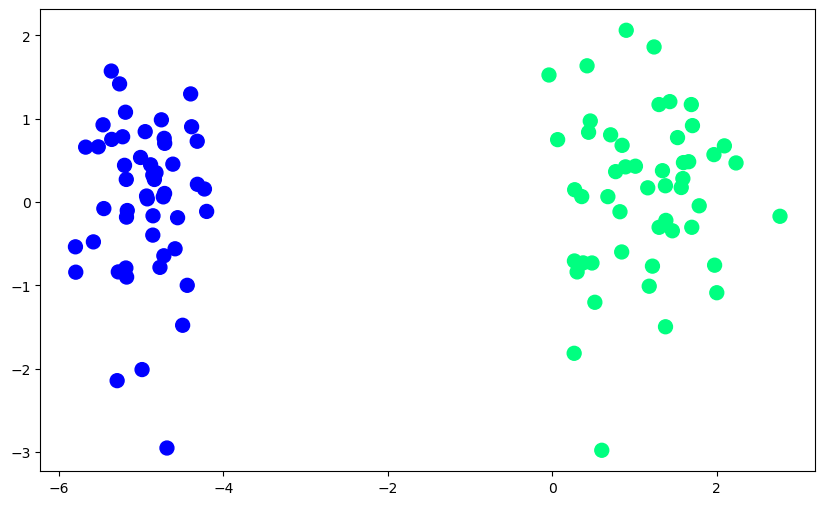

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y,cmap='winter',s=100)

In [15]:
X = np.insert(X, 0, 1, axis=1)
X

array([[ 1.        ,  0.82321545, -0.11697552],
       [ 1.        ,  0.37514771, -0.73115232],
       [ 1.        ,  0.26947761, -0.7081059 ],
       [ 1.        , -4.98744874, -2.01199214],
       [ 1.        ,  0.4231285 ,  1.63493163],
       [ 1.        , -4.2289949 ,  0.15599044],
       [ 1.        , -5.18865382,  1.07782053],
       [ 1.        ,  0.7096287 ,  0.80626713],
       [ 1.        ,  0.06531501,  0.74859527],
       [ 1.        , -5.3563263 ,  0.75152794],
       [ 1.        , -5.17487315, -0.90114581],
       [ 1.        , -5.17644221, -0.1815243 ],
       [ 1.        ,  0.60202649, -2.98092432],
       [ 1.        ,  1.42960231,  1.20500136],
       [ 1.        , -5.22359581,  0.78302407],
       [ 1.        ,  1.01127528,  0.42968688],
       [ 1.        ,  0.48288133, -0.73229726],
       [ 1.        , -5.27614308, -0.83930476],
       [ 1.        ,  0.44163889,  0.83727062],
       [ 1.        , -5.167179  , -0.10255323],
       [ 1.        , -5.67316396,  0.658

In [16]:
X.shape

(100, 3)

In [17]:
class PerceptronModel:
    def __init__(self, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
    
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)

        for i in range(self.epochs):
            random=np.random.randint(0, samples)
            X_random = X[random]
            y_actual = y[random]

            y_predict = np.dot(X_random, self.weights)

            if y_predict >=0:
                y_predict = 1
            else:
                y_predict = 0

            self.weights = self.weights + self.learning_rate * (y_actual - y_predict) * X_random

        print("Weights after training:", self.weights)

In [18]:
model = PerceptronModel()
model.fit(X, y)

Weights after training: [0.         0.49026548 0.04781164]


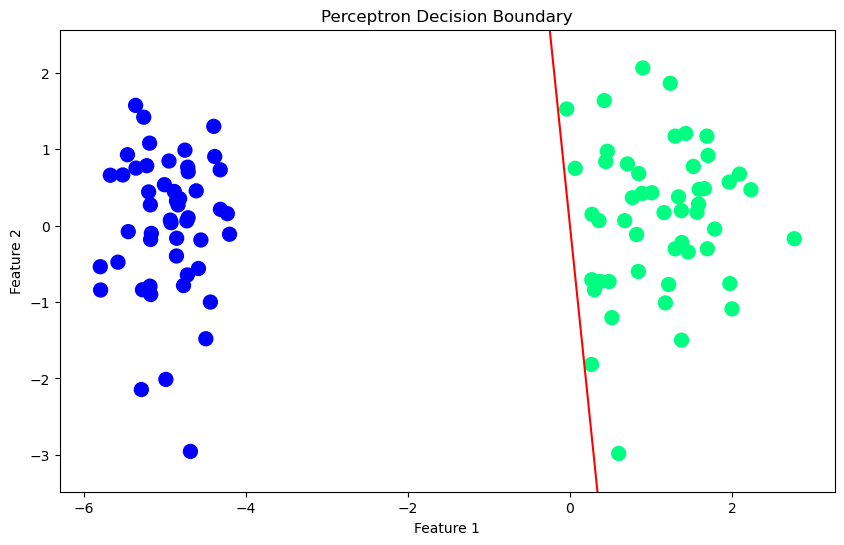

In [19]:
x1 = X[:, 1]
x2 = X[:, 2]

plt.figure(figsize=(10,6))
plt.scatter(x1, x2, c=y, cmap='winter', s=100)

if abs(model.weights[2]) < 1e-8:
    # nearly vertical boundary: w0 + w1*x1 = 0
    x_vertical = -model.weights[0] / model.weights[1]
    plt.axvline(x=x_vertical, color='red')
else:
    x_values = np.array([x1.min(), x1.max()])
    y_values = -(model.weights[0] + model.weights[1] * x_values) / model.weights[2]
    plt.plot(x_values, y_values, color='red')

# keep axes focused on data range
plt.xlim(x1.min()-0.5, x1.max()+0.5)
plt.ylim(x2.min()-0.5, x2.max()+0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()